<a href="https://colab.research.google.com/github/MiguelAngel-ht/Plots_in_Python-/blob/main/Box_Plot_%26_Time_Series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LIBRARIES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# DATASET FROM
# https://climate.weather.gc.ca/climate_data/daily_data_e.html?hlyRange=2011-12-14%7C2022-03-06&dlyRange=2011-12-15%7C2022-03-06&mlyRange=%7C&StationID=49908&Prov=ON&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=1840&EndYear=2022&selRowPerPage=25&Line=3&searchMethod=contains&Month=1&Day=6&txtStationName=Hamilton&timeframe=2&Year=2021

In [ ]:
# READ AND SHOW DATAFRAME

data = pd.read_csv('en_climate_daily_ON_6153193_2021_P1D.csv')
data.head(3)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.94,43.17,HAMILTON A,6153193,2021-01-01,2021,1,1,NaN,0.1,...,2.0,NaN,9.2,NaN,0.0,T,7.0,NaN,41.0,NaN
1,-79.94,43.17,HAMILTON A,6153193,2021-01-02,2021,1,2,NaN,0.6,...,2.0,NaN,9.2,NaN,2.0,NaN,NaN,M,NaN,M
2,-79.94,43.17,HAMILTON A,6153193,2021-01-03,2021,1,3,NaN,0.6,...,3.8,NaN,3.8,NaN,2.0,NaN,NaN,NaN,NaN,M


In [ ]:
# VALUES TO PLOT AND REPLACE "NAN" VALUES WITH 0'S 

all_months = []; y = []
months = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x = np.arange(1,13,1)
for i in x:
  all_months.append(np.array(data[(data["Month"] == i)]['Mean Temp (°C)'].replace(np.nan, 0)))
  y.append(np.mean(data[(data["Month"] == i)]['Mean Temp (°C)'].replace(np.nan,0)))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


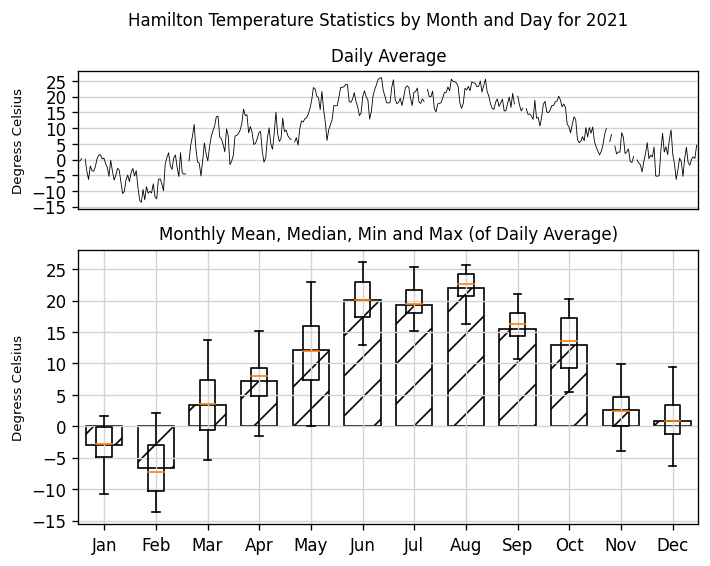

In [ ]:
# SUBPLOT 

fig, (ax0, ax1) = plt.subplots(2, 1,figsize=(800/120, 600/120), 
                               dpi=120,  gridspec_kw={'height_ratios': [1, 2]})

plt.suptitle("Hamilton Temperature Statistics by Month and Day for 2021",fontsize=10)
ax0.plot(data.index,data['Mean Temp (°C)'], c='k',linewidth=0.5)
ax0.set_xlim(1,365)
ax0.set_title('Daily Average',fontsize=10)
ax0.set_ylabel('Degress Celsius',fontsize=8)
ax0.set_yticks(np.arange(-15, 29, step=5))
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax0.grid(axis='y',c='lightgray')

ax1.grid(c='lightgray')
ax1.set_title("Monthly Mean, Median, Min and Max (of Daily Average)",fontsize=10)
ax1.set_ylabel('Degress Celsius',fontsize=8)
ax1.set_yticks(np.arange(-15, 29, step=5))
ax1.boxplot(all_months,widths=0.3,meanline=True,sym='', showfliers=True)
ax1.bar(x,y,width=0.7,color='w', edgecolor='black', hatch='/',linewidth=1)
ax1.set_xticklabels(months[1:])

fig.savefig("img.png")
fig.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


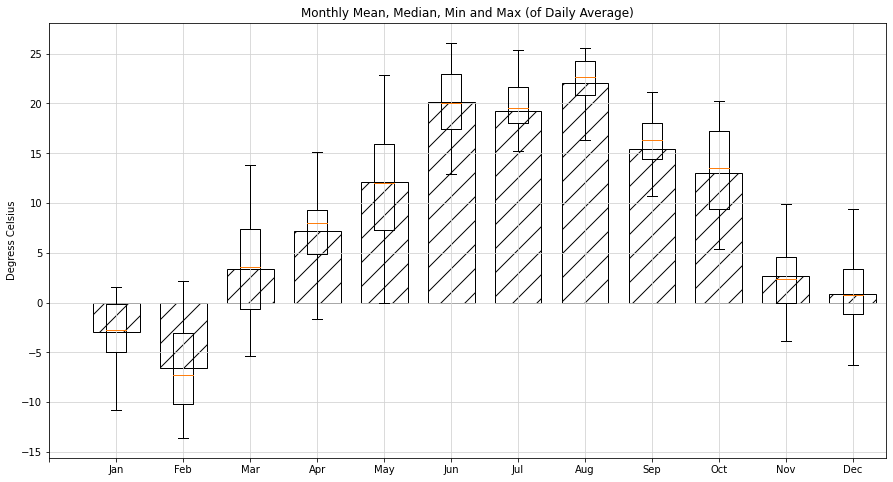

In [ ]:
plt.figure(figsize=(15,8))
plt.grid(c='lightgray')
plt.title("Monthly Mean, Median, Min and Max (of Daily Average)")
plt.ylabel('Degress Celsius')
plt.boxplot(all_months,widths=0.3,meanline=True,sym='', showfliers=True)
plt.bar(x,y,width=0.7,color='w', edgecolor='black', hatch='/',linewidth=1)
plt.xticks(range(len(months)), months)
plt.show()


In [ ]:
plt.figure(figsize=(15,3))
plt.plot(data.index,data['Mean Temp (°C)'], c='k',linewidth=0.5)
plt.xlim(1,365)
plt.title('Daily Average')
plt.ylabel('Degress Celsius')
plt.yticks(np.arange(-15, 29, step=5))
plt.xticks(color='w')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid(axis='y',c='lightgray')
plt.show()